In [1]:
#Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree


In [2]:
data = pd.read_csv("filtered_dataset_weather.csv")

In [3]:
data.head()


,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,fog
2,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,fog
3,1/1/2012 5:00,-1.4,-3.3,87,9,6.4,101.27,fog
4,1/1/2012 6:00,-1.5,-3.1,89,7,6.4,101.29,fog


In [4]:
# Split data into features and labels
X = data[['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h', 'Visibility_km', 'Press_kPa']]
y = data['Weather']


In [5]:

# Display the split data
print("\nFeatures (X):")
print(X.head())
print("\nLabels (y):")
print(y.head())



Features (X):
   Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  Visibility_km  \
0    -1.8              -3.9         86                4            8.0   
1    -1.8              -3.7         87                4            8.0   
2    -1.5              -3.3         88                7            4.8   
3    -1.4              -3.3         87                9            6.4   
4    -1.5              -3.1         89                7            6.4   

   Press_kPa  
0     101.24  
1     101.24  
2     101.23  
3     101.27  
4     101.29  

Labels (y):
0    fog
1    fog
2    fog
3    fog
4    fog
Name: Weather, dtype: object


In [6]:
# Compute and display the number of null values in each column
null_counts = data.isnull().sum()
print("Number of null values in each column:")
print(null_counts)


Number of null values in each column:
Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(report)

Accuracy: 0.63

Classification Report:
              precision    recall  f1-score   support

        Rain       0.19      0.21      0.20        61
       clear       0.67      0.67      0.67       663
      cloudy       0.67      0.65      0.66       785
     drizzle       0.33      0.32      0.33        25
         fog       0.51      0.60      0.55        30
        rain       0.36      0.44      0.39        55
        snow       0.77      0.71      0.74       111

    accuracy                           0.63      1730
   macro avg       0.50      0.51      0.51      1730
weighted avg       0.64      0.63      0.64      1730



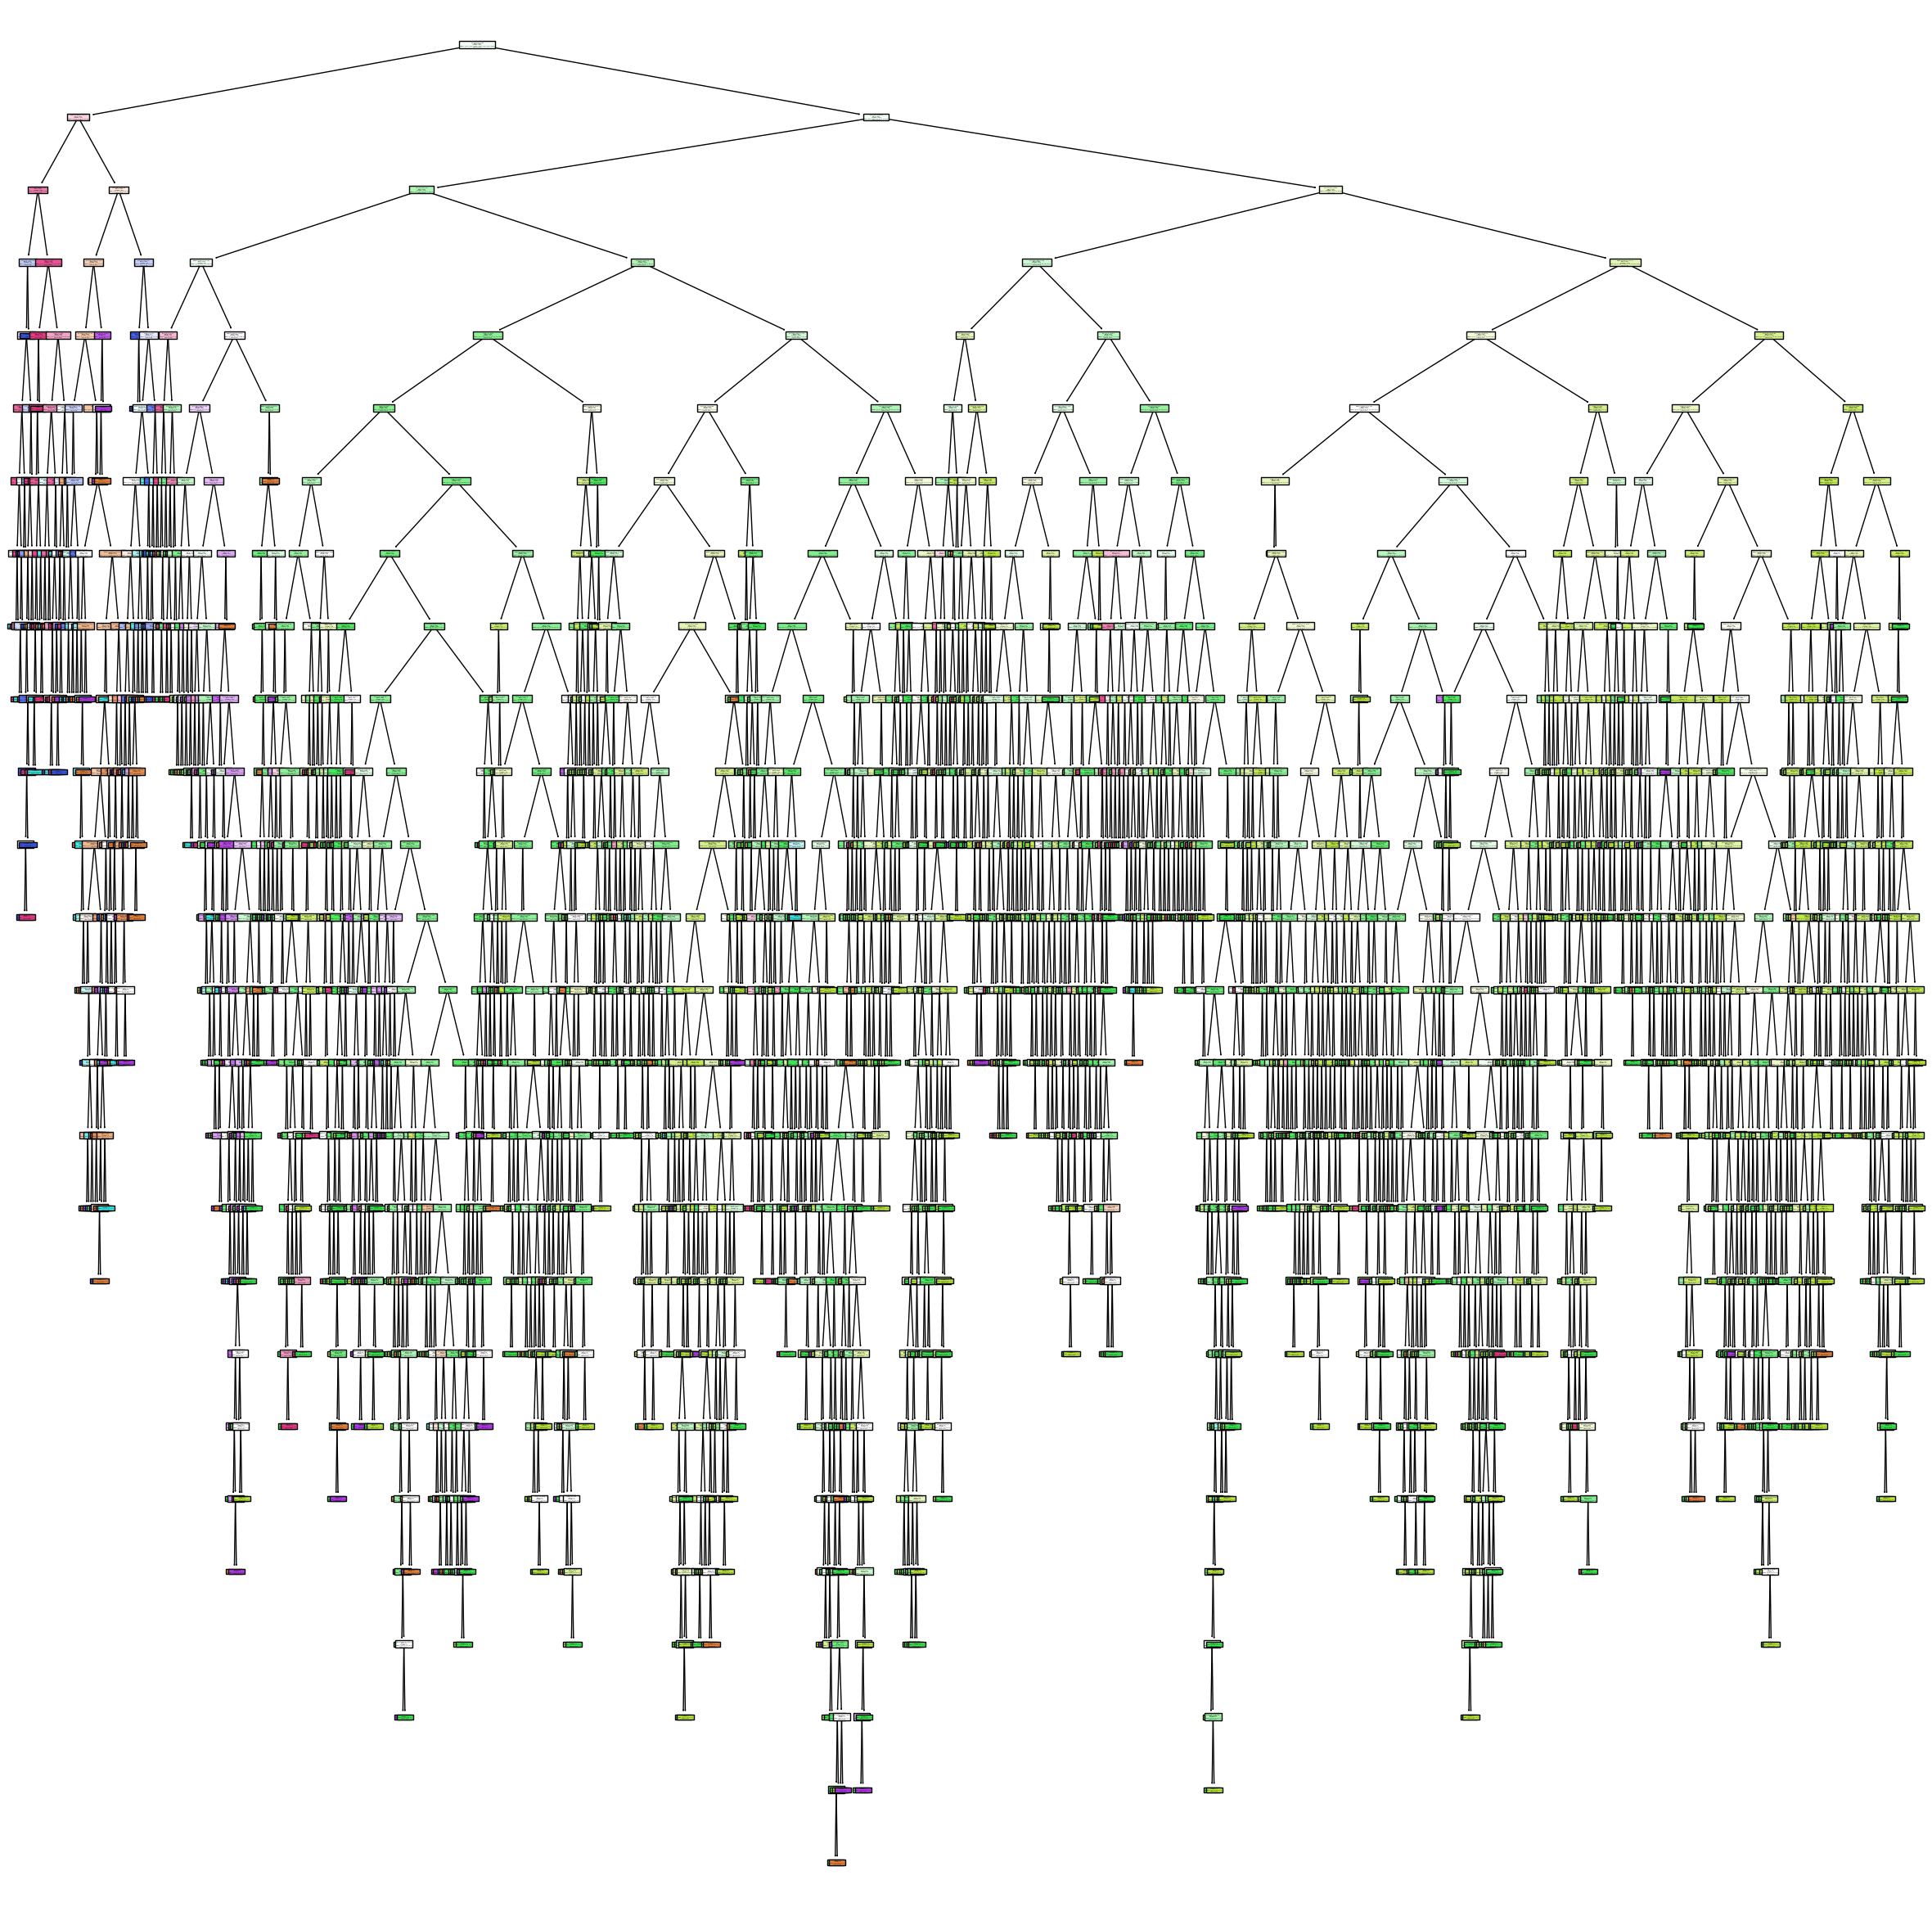

In [8]:
plt.figure(figsize=(30,30))
plot_tree(clf, feature_names=X.columns, filled=True, class_names=clf.classes_)
plt.show()

In [9]:
unique_weather_values = data['Weather'].unique()

print("Unique values in 'Weather' column:")
print(unique_weather_values)

Unique values in 'Weather' column:
['fog' 'cloudy' 'rain' 'Rain' 'clear' 'snow' 'drizzle']


In [11]:
def predict_input():
    # Collecting input values for each feature
    temp_c = float(input("Enter Temperature (Temp_C): "))
    dew_point_temp_c = float(input("Enter Dew Point Temperature (Dew Point Temp_C): "))
    rel_hum = float(input("Enter Relative Humidity (Rel Hum_%): "))
    wind_speed = float(input("Enter Wind Speed (Wind Speed_km/h): "))
    visibility = float(input("Enter Visibility (Visibility_km): "))
    pressure = float(input("Enter Pressure (Press_kPa): "))

    # Prepare the input data for prediction
    input_data = np.array([[temp_c, dew_point_temp_c, rel_hum, wind_speed, visibility, pressure]])

    # Predict using the trained model
    prediction = clf.predict(input_data)

    # Display the prediction result
    print(f"Prediction: {prediction[0]}")

# Call the function to take input and predict
predict_input()

Enter Temperature (Temp_C): 1
Enter Dew Point Temperature (Dew Point Temp_C): -3.5
Enter Relative Humidity (Rel Hum_%): 86
Enter Wind Speed (Wind Speed_km/h): 4
Enter Visibility (Visibility_km): 8
Enter Pressure (Press_kPa): 101
Prediction: snow


E:\enaconda\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Enter Temperature (Temp_C): 1
Enter Dew Point Temperature (Dew Point Temp_C): -3.5
Enter Relative Humidity (Rel Hum_%): 86
Enter Wind Speed (Wind Speed_km/h): 4
Enter Visibility (Visibility_km): 8
Enter Pressure (Press_kPa): 101
# Prediction: snow